In [1]:
#import Requuired Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score


In [2]:
#Load The Dataset
wine = pd.read_csv("red_wine_quality.csv")

In [3]:
#View Top Rows to see data
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# View data Informatio 
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# view data description to identify any data distribution issues
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


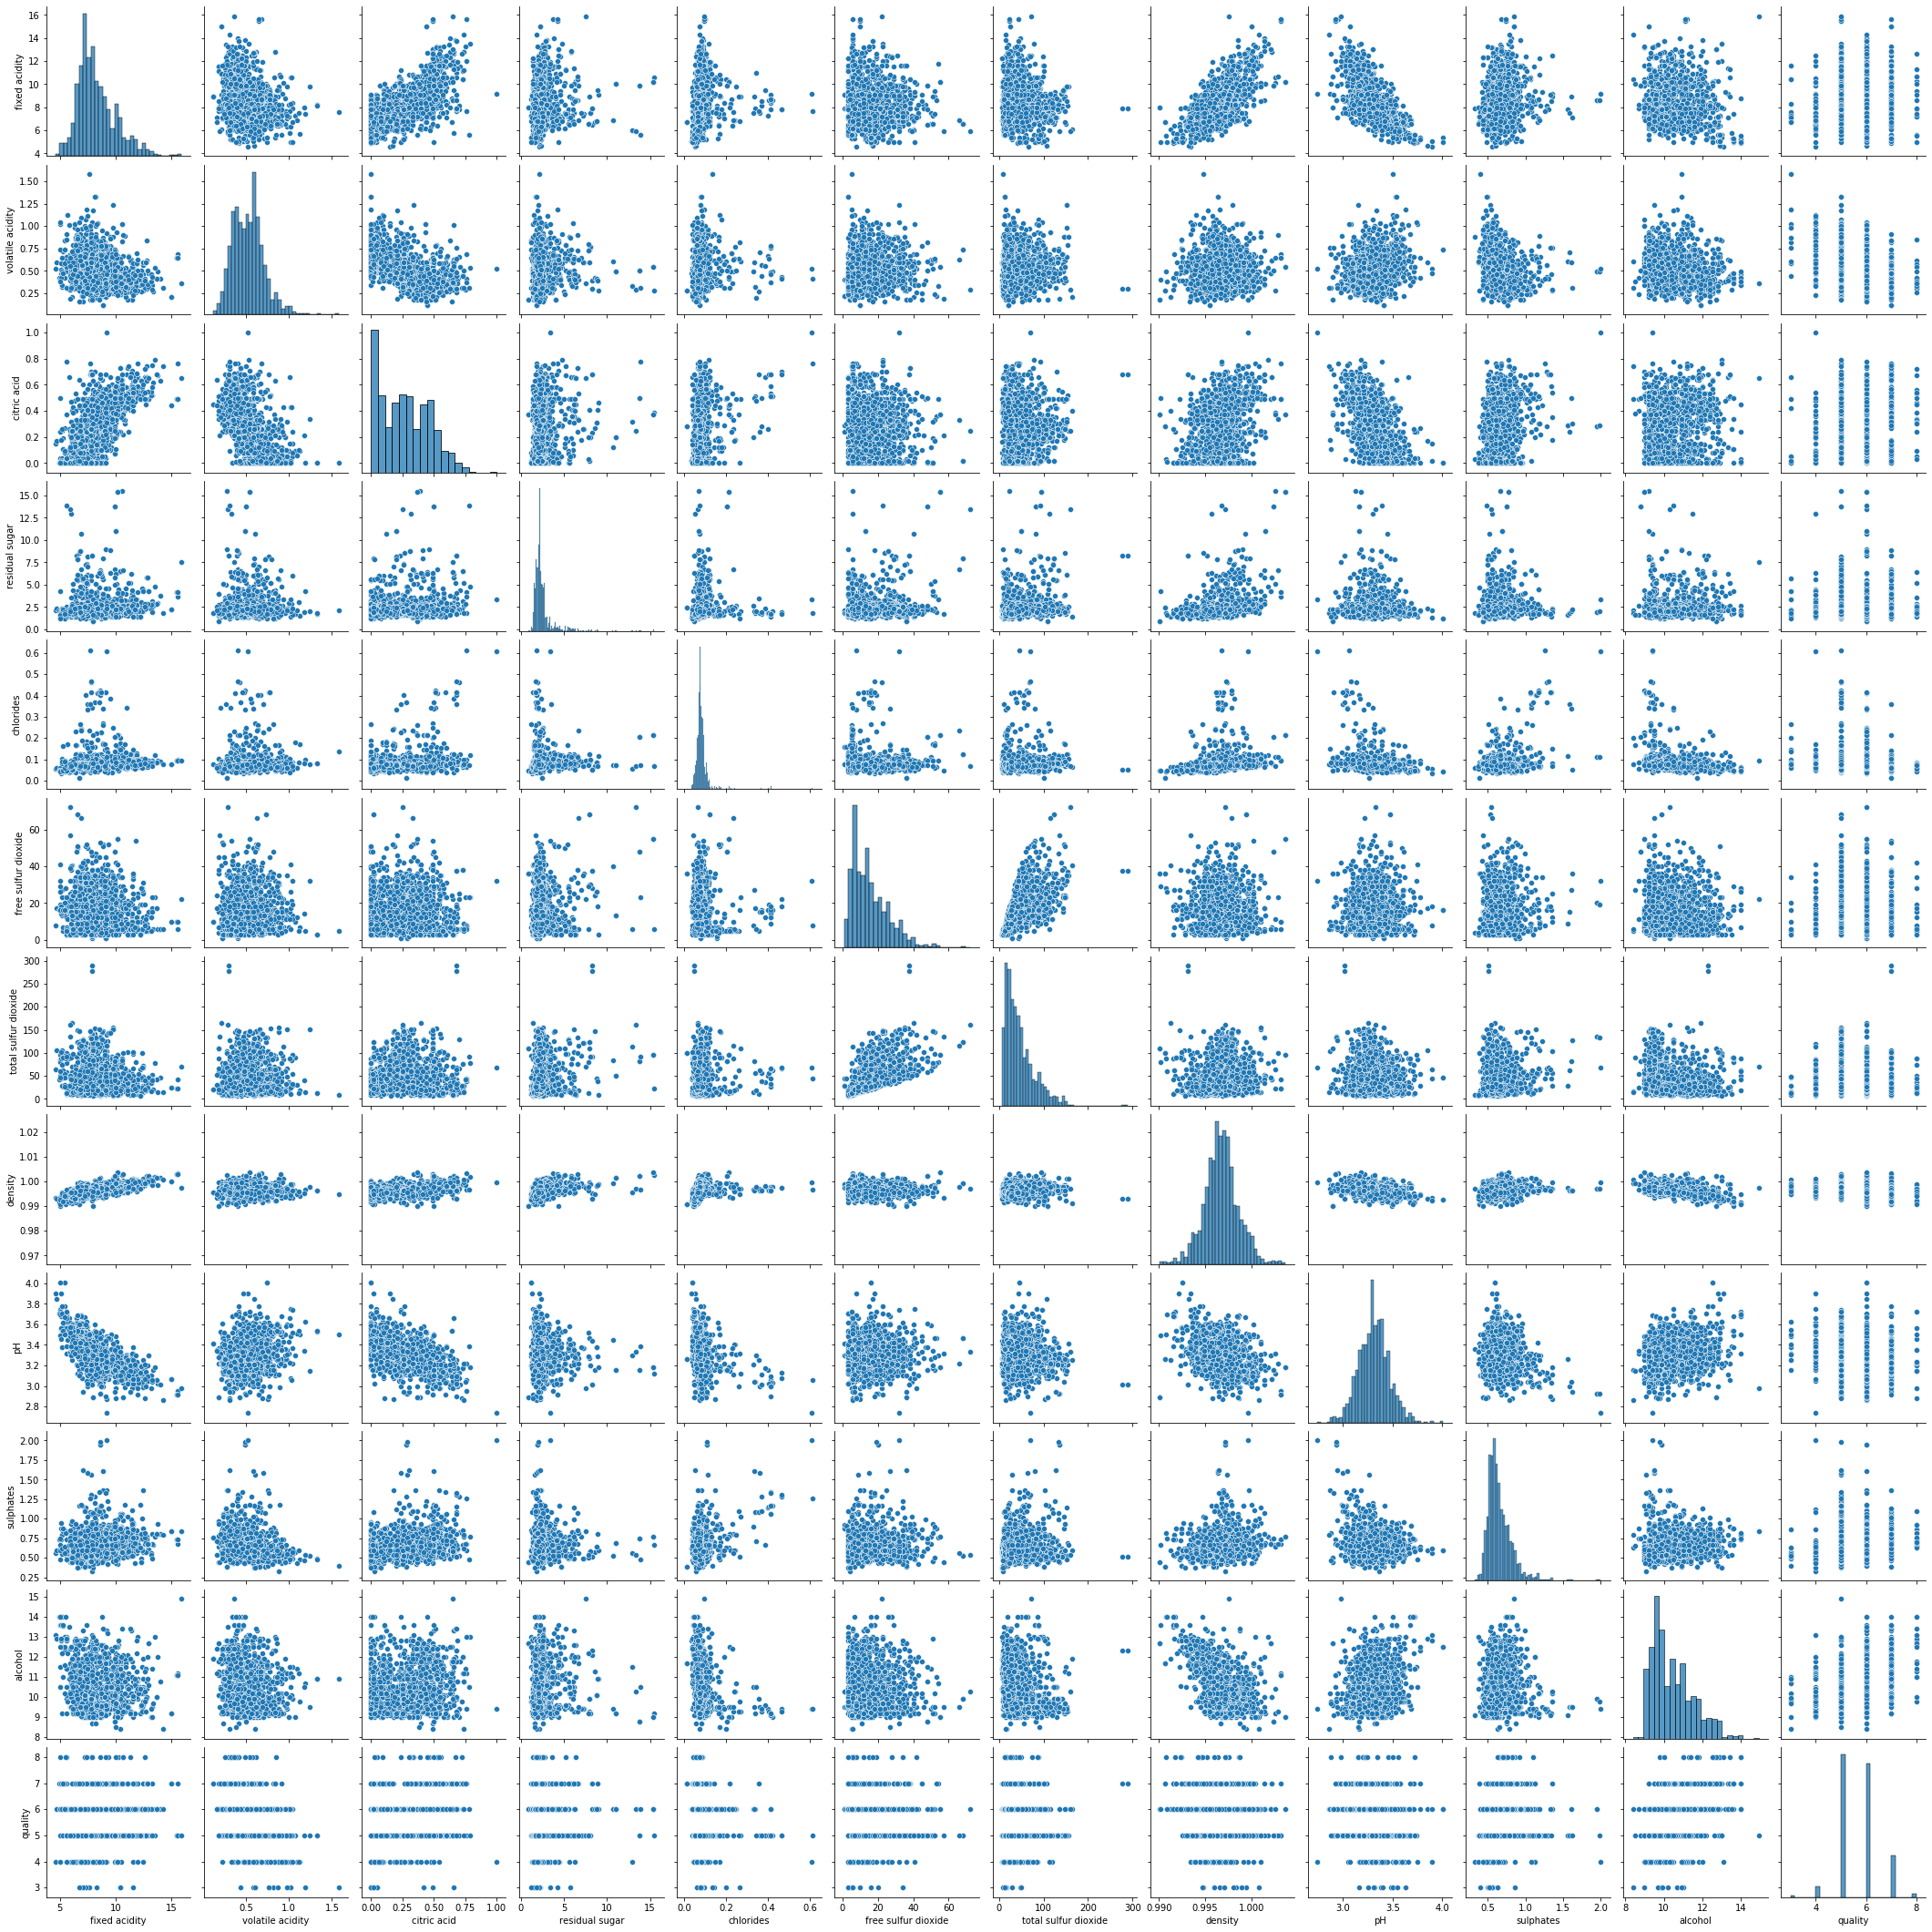

In [6]:
# Plot all Variable to see distribution of data
sns.pairplot(wine)

Compare each of the variable to Output variable and see its realtionship

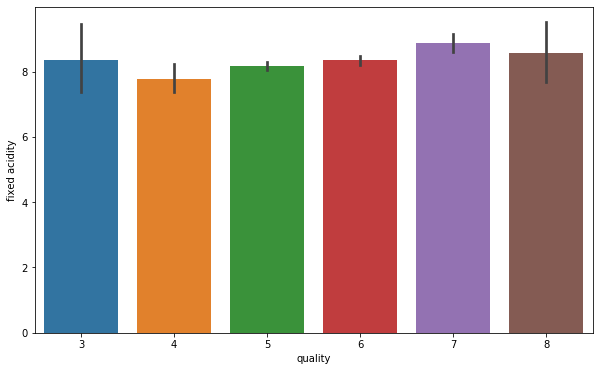

In [7]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x="quality", y = "fixed acidity", data =wine)

From the above barchart it is quite evident that the fixed acidity does not give any specificatin to classify the wine quality.

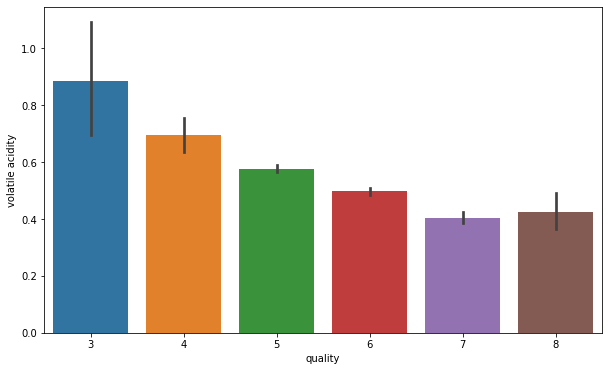

In [8]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x="quality", y = "volatile acidity", data =wine)

we can observe here that as the quality of wine goes higher the volatile acidity of the wine gets lesser. There is a downward trend.

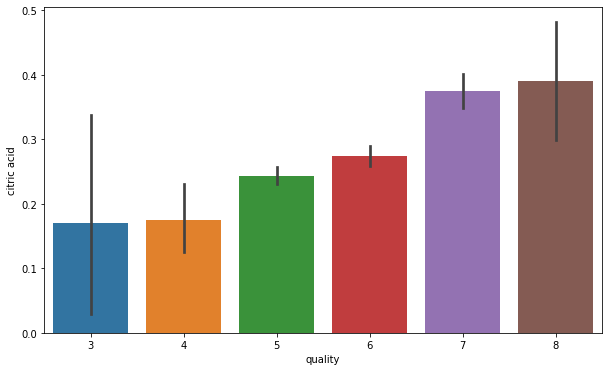

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x="quality", y = "citric acid", data =wine)

As we can see above the amount of citric acid in wine is getting higher as the quality of wine increase, This shows an upward trend 

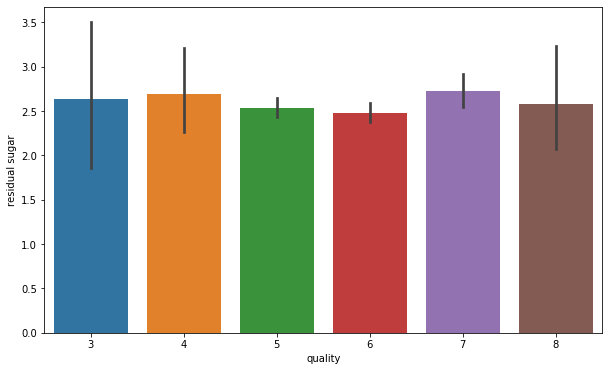

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x="quality", y = "residual sugar", data =wine)

No major variation observed the residual sugar with respect to Quality

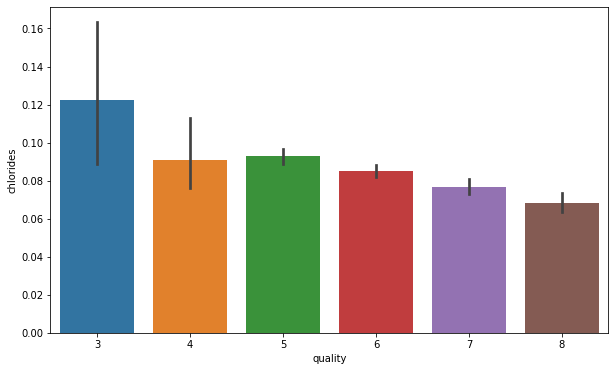

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x="quality", y = "chlorides", data =wine)

The Amount of chlorides are depicting a downward trend, so as the quality gets higher the amount of chlorides decreases

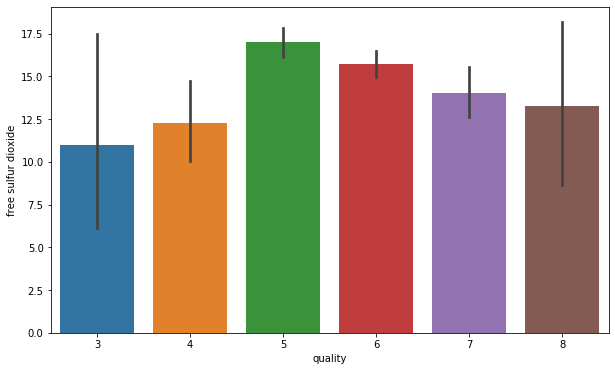

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x="quality", y = "free sulfur dioxide", data =wine)

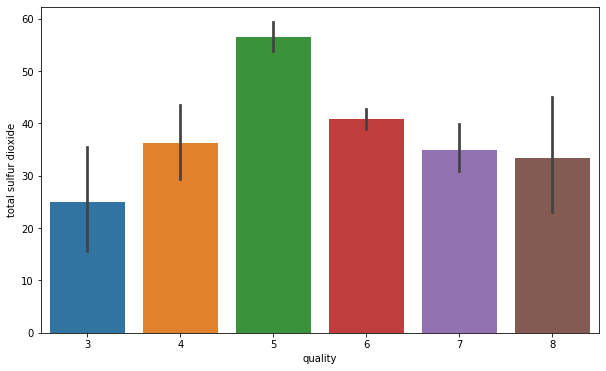

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x="quality", y = "total sulfur dioxide", data =wine)

The Free Sulfur Dioxide and Total Sulfur di oxide looks normally distributed over the entire data

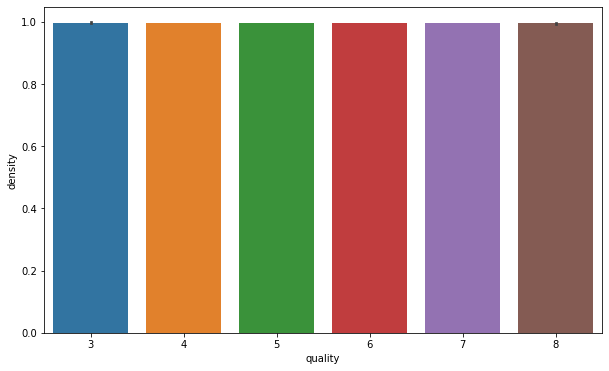

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x="quality", y = "density", data =wine)

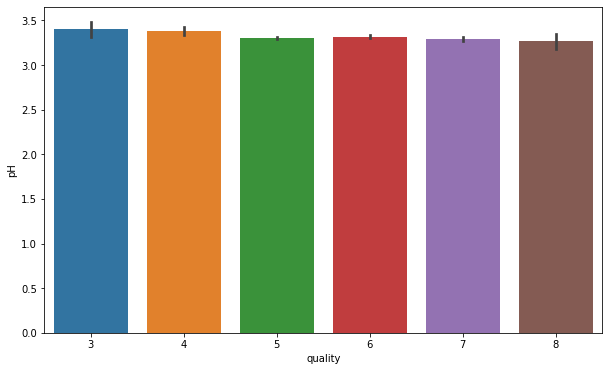

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x="quality", y = "pH", data =wine)

The Density and pH are almost constant and doesnt have real impact on the prediction of the wine quality

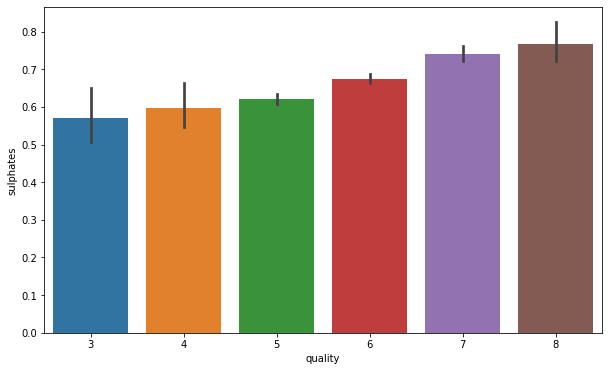

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x="quality", y = "sulphates", data =wine)

The Amount of sulphates in increasing with the increase in quality

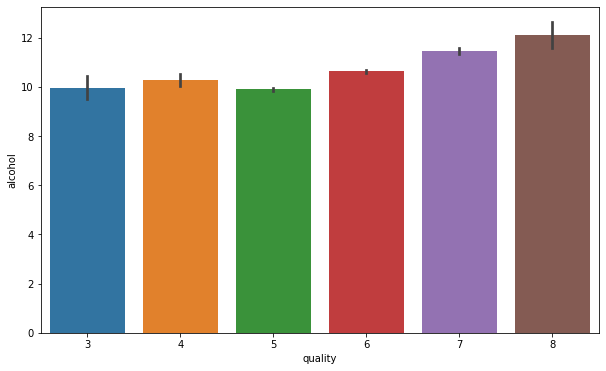

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x="quality", y = "alcohol", data =wine)

Alcohol level also increases with the increase in wine quality

In [18]:
# Check for Missing Values

wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No Null Values are present in the Dataset

As given in the problem statement we have to make binary classification of Target variable. Dividing wine as good and bad by giving limit for the quality

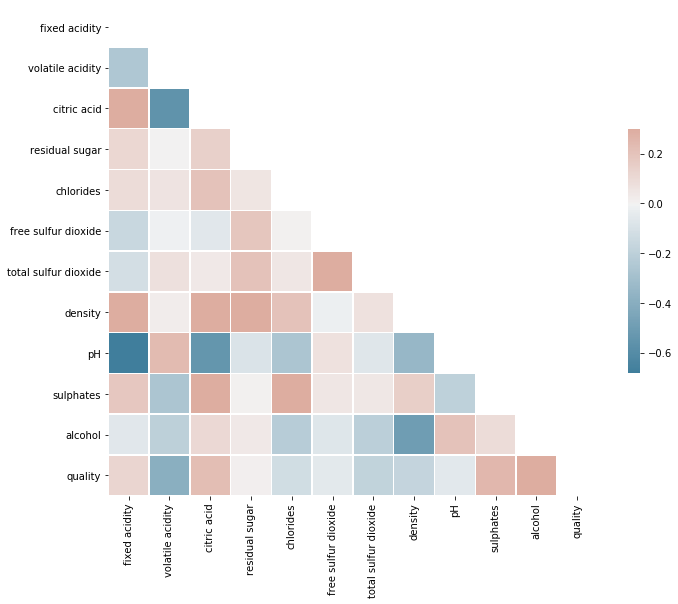

In [19]:
corr =wine.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [21]:
bins = (2,6.5,9)
grp_names = ['bad','good']
wine["quality"] = pd.cut(wine["quality"],bins =bins, labels = grp_names)

In [22]:
lbl_qlty = LabelEncoder()

In [23]:
wine["quality"]= lbl_qlty.fit_transform(wine["quality"])

In [24]:
wine["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

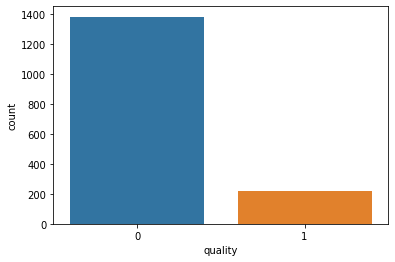

In [25]:
sns.countplot(x=wine["quality"])

In [26]:
#Seperate  the dataset as target variable and feature variable
x= wine.drop("quality",axis=1)
y= wine["quality"]

In [27]:
x.shape

(1599, 11)

In [28]:
y.shape

(1599,)

In [29]:
#train Test splitting data
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state = 43)

In [30]:
#Applyig Standard Scaler to scale values

sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

APPLYING VARIOUS CLASSIFICATION ALGORITHM

RANDOM FOREST CLASSIFIER

In [39]:
rfc = RandomForestClassifier(n_estimators=100)

In [40]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
pred_rfc = rfc.predict(x_test)

In [42]:
#check Random Forest Classifier Performance
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       274
           1       0.73      0.41      0.53        46

    accuracy                           0.89       320
   macro avg       0.82      0.69      0.73       320
weighted avg       0.88      0.89      0.88       320



Random Forest gives us an accuracy of 88%

In [44]:
#Confusion Matrix for Random Forest
print(confusion_matrix(y_test,pred_rfc))

[[267   7]
 [ 27  19]]


SGD CLASSIFIER

In [45]:
sgd = SGDClassifier()

In [46]:
sgd.fit(x_train,y_train)

SGDClassifier()

In [47]:
pred_sgd = sgd.predict(x_test)

In [48]:
#check for SGD Classifier Performance
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       274
           1       0.53      0.54      0.54        46

    accuracy                           0.87       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.87      0.87      0.87       320



SGD Classifier gives us an accuracy of 87%

#Confusion Matrix for SGD Classifier
print(confusion_matrix(y_test,pred_sgd))

SUPPORT VECTOR CLASSIFIER

In [50]:
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

In [51]:
# check for SVC performance
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       274
           1       0.81      0.37      0.51        46

    accuracy                           0.90       320
   macro avg       0.86      0.68      0.72       320
weighted avg       0.89      0.90      0.88       320



Support Vector Classifier gives us an accuracy of 89%

Fine Tuning Model Using Cross Validation

GRID SEARCH CV

In [54]:
# FOR SVC
pmtrs= {"C" : [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4], "kernel":["linear","rbf"], "gamma":[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]}
grid_svc = GridSearchCV(svc, param_grid = pmtrs ,cv = 10)

In [55]:
grid_svc.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']})

In [57]:
grid_svc.best_params_

{'C': 1.2, 'gamma': 1.3, 'kernel': 'rbf'}

In [59]:
#Execution of SVC again with with best paramaeters
svcagain = SVC(C=1.2,gamma =1.3,kernel="rbf")
svcagain.fit(x_train,y_train)
pred_svcagain = svcagain.predict(x_test)
print(classification_report(y_test,pred_svcagain))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       274
           1       0.88      0.48      0.62        46

    accuracy                           0.92       320
   macro avg       0.90      0.73      0.79       320
weighted avg       0.91      0.92      0.90       320



SVC improves Score from 89% to 91% using GridSearch CV

Cross Validation Score for Random Forest and SGD Classifier

In [61]:
rfc_val = cross_val_score(estimator =rfc, X = x_train,y=y_train, cv =10)
rfc_val.mean()

0.9147945374015748

Random Forest Classifer Accuracy Increases from 88% to 91 % using Cross Validation

In [62]:
sgd_val = cross_val_score(estimator =sgd, X = x_train,y=y_train, cv =10)
sgd_val.mean()

0.8342027559055119

Accuracy for SGD Classifier decrease to 83% from 87 % when using cross validation

AUC ROC Curves and score for Random Forest Classifier

In [79]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [80]:
rfc_probs = rfc.predict_proba(x_test)

In [81]:
rfc_probs = rfc_probs[:, 1]

In [82]:
rfc_auc = roc_auc_score(y_test, rfc_probs)


In [83]:
print('Random Forest Classifier: ROC AUC=%.3f' % (rfc_auc))


Random Forest Classifier: ROC AUC=0.944


In [84]:
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)


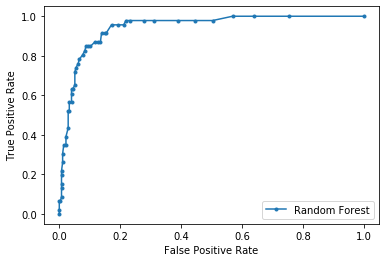

In [85]:
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

From all Above we can conclude that Both Random Forest and SVC are giving us almost similar accuracy after performing Hyper Parameter Tuning. However Random Forest Classifier having a little edge over SVC, and should be considerd as best algorithm for prediction of red wine quality